**Objective**

The objective of this notebook is to perform data preprocessing and Exploratory Data Analysis (EDA) of AMR dataset.

## Importing the required libraries 

In [1]:
import pandas as pd
import numpy as np

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Classification metrics
from sklearn.metrics import confusion_matrix, classification_report

# filter warnings
import warnings
warnings.filterwarnings("ignore")

# Removes the limit from the number of displayed columns and rows.
# This is so that entire datafraeme can be seen when printed
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)


## Import the data  

In [2]:
# Load the data
df_admissions = pd.read_csv('Resources/admissions.csv')
df_patients = pd.read_csv('Resources/patients.csv')

In [3]:
# display the first 5 rows of the dataframe
df_admissions.head()

,patient_id,date_admission,ciprofloxacin,gentamicin,amoxicillin_clavulanic_acid
0,7923,3,S,S,S
1,7825,1,S,S,R
2,5375,2,S,R,S
3,2118,2,S,R,R
4,12,1,S,R,S


In [4]:
# display the first 5 rows of the dataframe
df_patients.head()

,patient_nos,sex,age
0,1326,male,33
1,1813,male,67
2,249,male,68
3,4426,U,93
4,1461,male,21


In [5]:
# rename the patient_nos column to patient_id in the patients dataframe 
df_patients.rename(columns={'patient_nos': 'patient_id'}, inplace=True)

In [6]:
# out of total patients how many are males, females and others (unknown) from sex column of df_patients dataframe
print(df_patients.sex.value_counts(normalize=True)) 

male      0.4644
female    0.3945
U         0.1411
Name: sex, dtype: float64


* There are about 46% of male patients, 40% female patients and 14% others which here is labelled as U.

In [7]:
# print the shape of the dataframes df_admissions and df_patients
print(df_admissions.shape)
print(df_patients.shape)

(10108, 5)
(10000, 3)


In [8]:
# combining the two dataframes on patient_id column and storing the result in a new dataframe df 
df = pd.merge(df_admissions, df_patients, on='patient_id')
df.head()

,patient_id,date_admission,ciprofloxacin,gentamicin,amoxicillin_clavulanic_acid,sex,age
0,7923,3,S,S,S,female,42
1,7923,2,S,R,S,female,42
2,7923,1,S,S,S,female,42
3,7825,1,S,S,R,female,21
4,5375,2,S,R,S,male,65


## Data Insights 

### Display the first 5 rows of the dataset. 

In [9]:
df.head(5)

,patient_id,date_admission,ciprofloxacin,gentamicin,amoxicillin_clavulanic_acid,sex,age
0,7923,3,S,S,S,female,42
1,7923,2,S,R,S,female,42
2,7923,1,S,S,S,female,42
3,7825,1,S,S,R,female,21
4,5375,2,S,R,S,male,65


In [10]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 10108 rows and 7 columns.


### Datatypes of the different columns in the dataset

In [11]:
df.dtypes

patient_id                      int64
date_admission                  int64
ciprofloxacin                  object
gentamicin                     object
amoxicillin_clavulanic_acid    object
sex                            object
age                             int64
dtype: object

S    90.08706
R     9.91294
Name: ciprofloxacin, dtype: float64

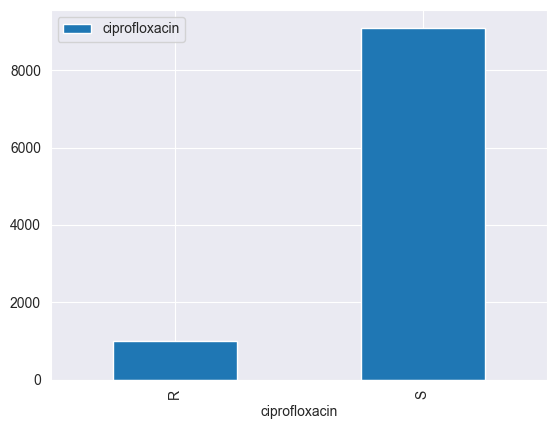

In [12]:
df.groupby("ciprofloxacin").agg({'ciprofloxacin': 'count'}).plot(kind='bar')
# show the value counts of ciprofloxacin column in the dataframe df 
df.ciprofloxacin.value_counts(normalize=True) * 100

* 90% of the patients are AMR resistant
* 10% of the patients are AMR sensitive

R    55.619311
S    44.380689
Name: gentamicin, dtype: float64

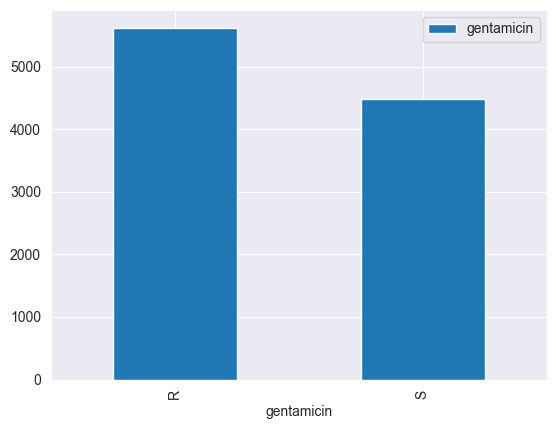

In [13]:
df.groupby("gentamicin").agg({'gentamicin': 'count'}).plot(kind='bar')
# show the value counts of gentamicin column in the dataframe df
df.gentamicin.value_counts(normalize=True) * 100

* 56% of the patients are AMR resistant
* 44% of the patients are AMR sensitive

S    85.348239
R    14.651761
Name: amoxicillin_clavulanic_acid, dtype: float64

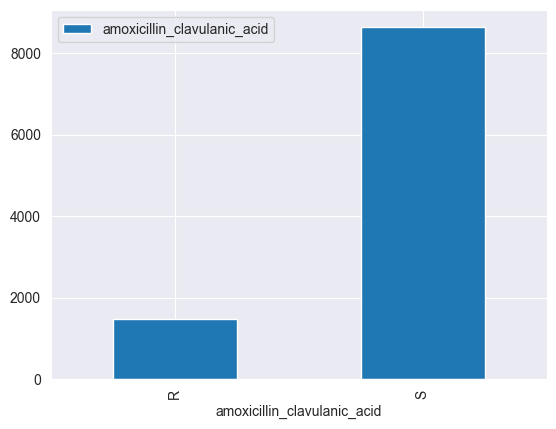

In [14]:
df.groupby("amoxicillin_clavulanic_acid").agg({'amoxicillin_clavulanic_acid': 'count'}).plot(kind='bar')
# show the value counts of amoxicillin_clavulanic_acid column in the dataframe df
df.amoxicillin_clavulanic_acid.value_counts(normalize=True) * 100

* 85% of the patients are AMR resistant
* 15% of the patients are AMR sensitive

In [15]:
df_col_num = df.select_dtypes('number').columns.to_list()
df_col_num

['patient_id', 'date_admission', 'age']

In [16]:
df_col_cat = df.select_dtypes('object').columns.to_list()
df_col_cat

['ciprofloxacin', 'gentamicin', 'amoxicillin_clavulanic_acid', 'sex']

### Statistical summary of the data

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
patient_id,10108.0,5040.163831,2881.654046,2.0,2554.0,5021.0,7550.25,10000.0
date_admission,10108.0,1.504947,0.773098,1.0,1.0,1.0,2.00,6.0
age,10108.0,58.722200,23.663027,18.0,39.0,59.0,79.00,99.0


## Data Preprocessing

### Checking for duplicate entries in the data

In [18]:
df.duplicated().sum()

0

* There are no duplicates in the dataframe

### Checking for missing values in the data.

In [19]:
df.isnull().sum()

patient_id                     0
date_admission                 0
ciprofloxacin                  0
gentamicin                     0
amoxicillin_clavulanic_acid    0
sex                            0
age                            0
dtype: int64

There are no missing values in the dataset.

##  Data Visualization

### Univariate Analysis

Creating helper functions data visualization

In [20]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [22]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [23]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Univariate analysis of different integer and categorical variables. 

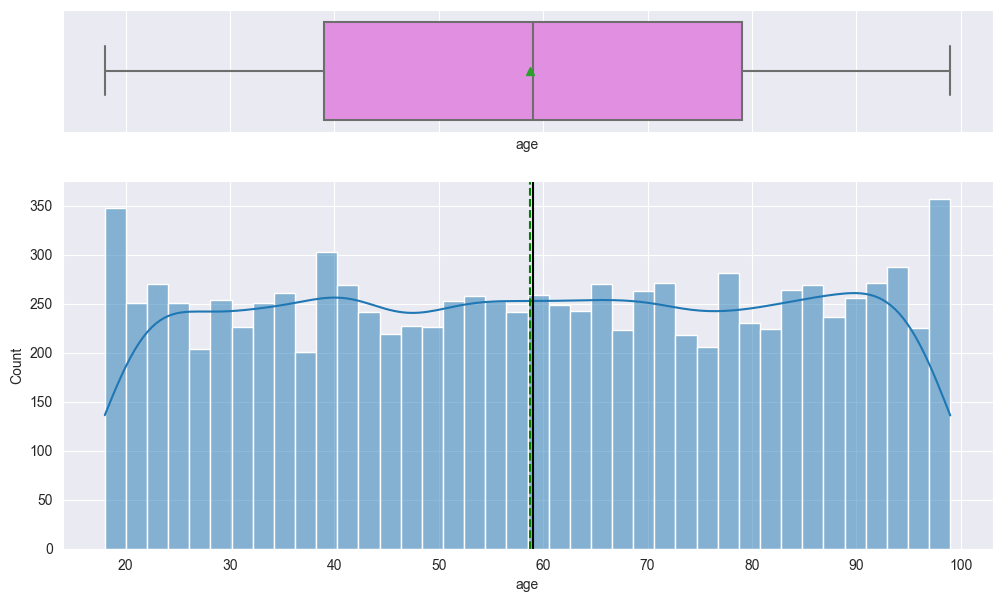

In [24]:
histogram_boxplot(data=df, feature= 'age', figsize=(12, 7), kde=True, bins=40)

* There are no outliers in the data
* The average age is about 58.

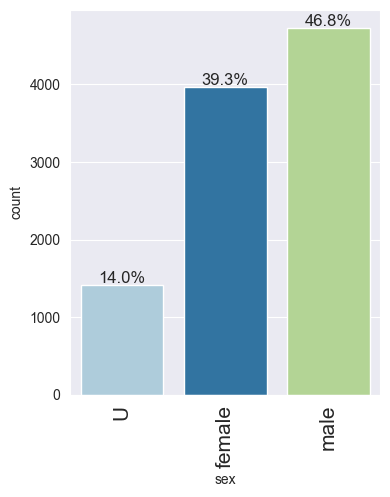

In [25]:
labeled_barplot(data= df, feature= 'sex', perc= True)

* 46.8% of the patients are males, 39.3% are female and 14% are others.


### Bivariate Analysis 

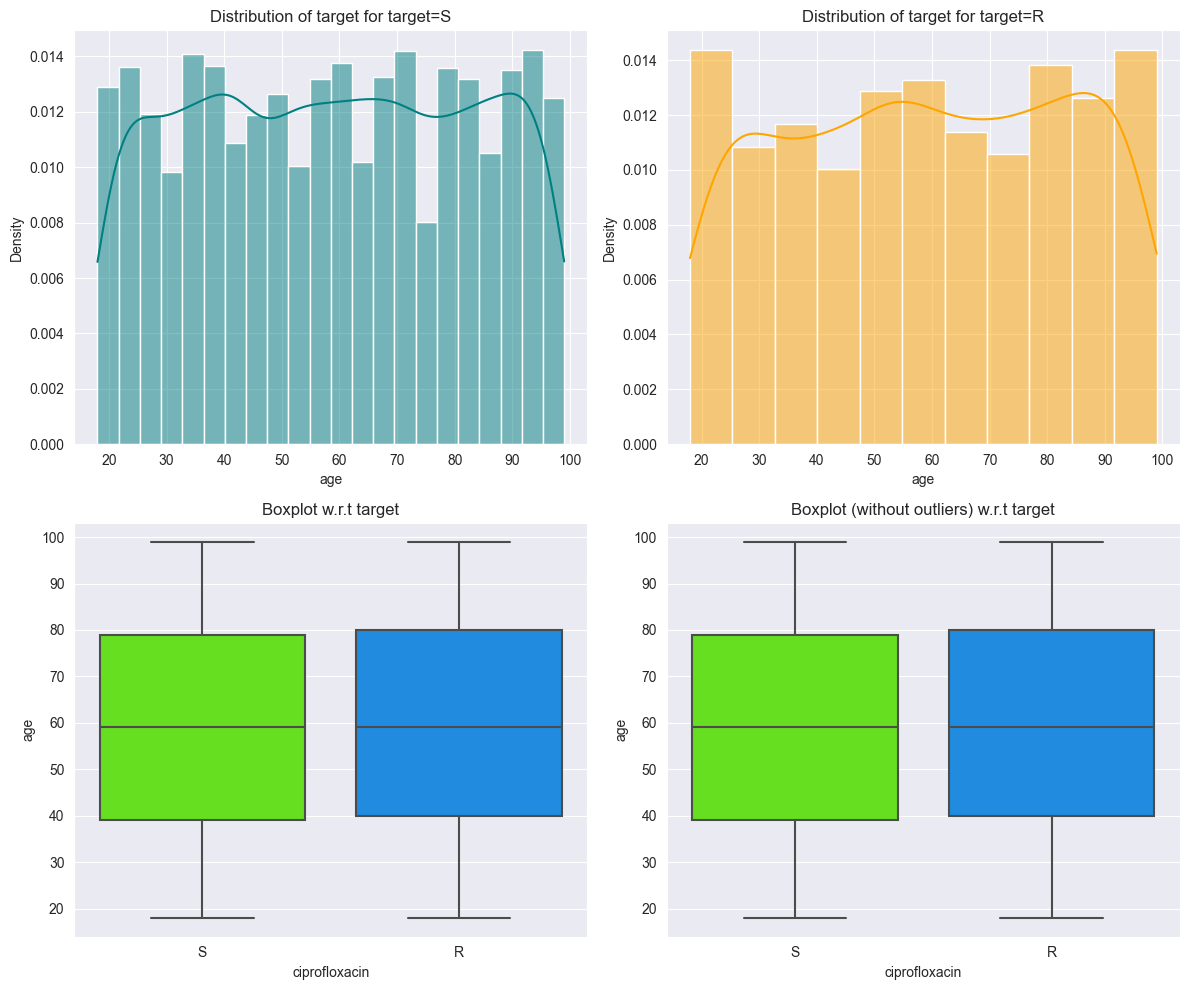

In [26]:
distribution_plot_wrt_target(data= df, predictor= 'age', target= 'ciprofloxacin')

- We can see that the median age of the patients who are sensitive and resistant to Ciprofloxacin antibiotic is about 58 Years.
- There are no outliers in boxplots of patients age.

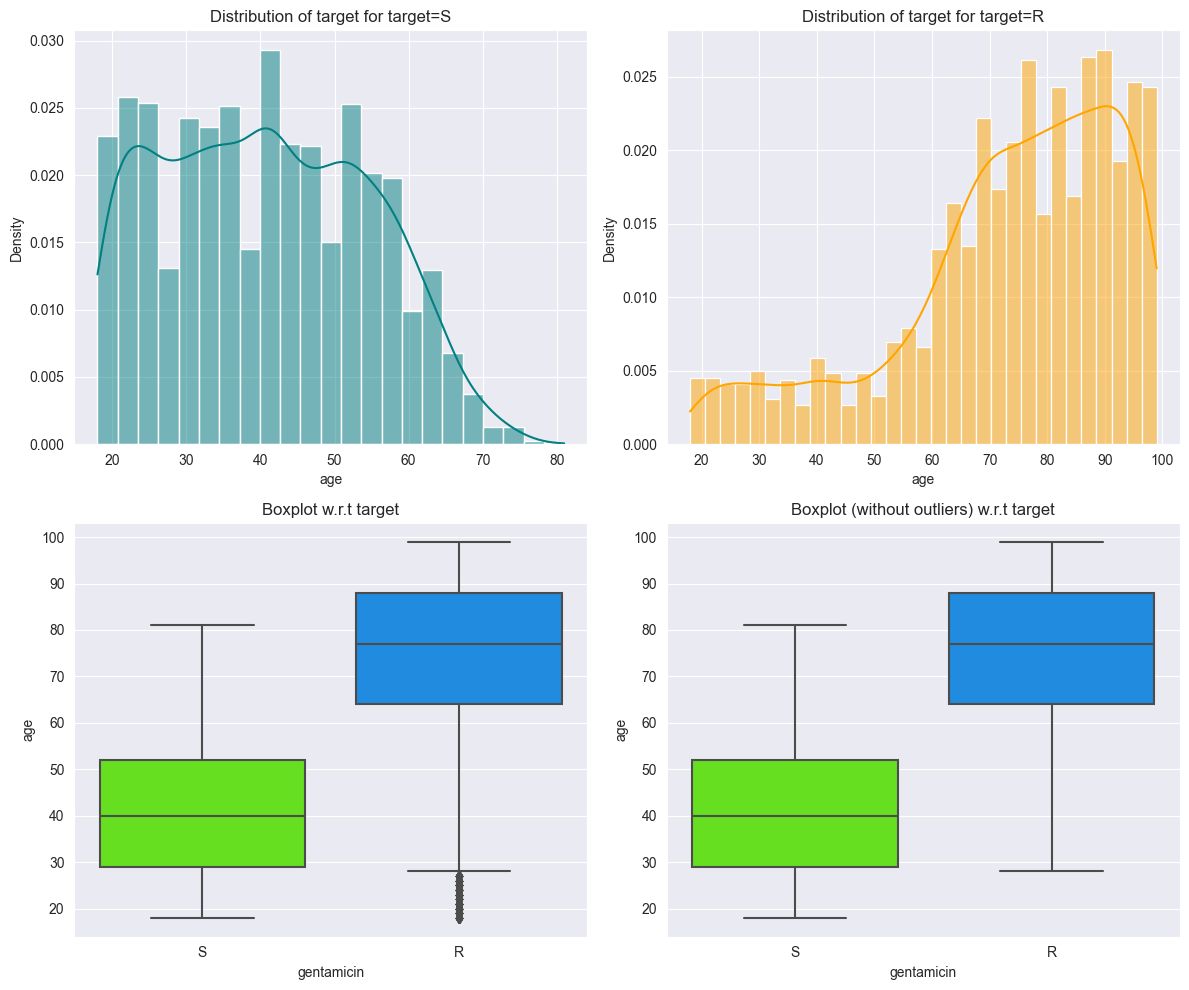

In [27]:
distribution_plot_wrt_target(data= df, predictor= 'age', target= 'gentamicin')

- We can see that the aged patients are AMR to drug gentamicin than young patients.
- There are outliers in the age of AMR resistant patients.

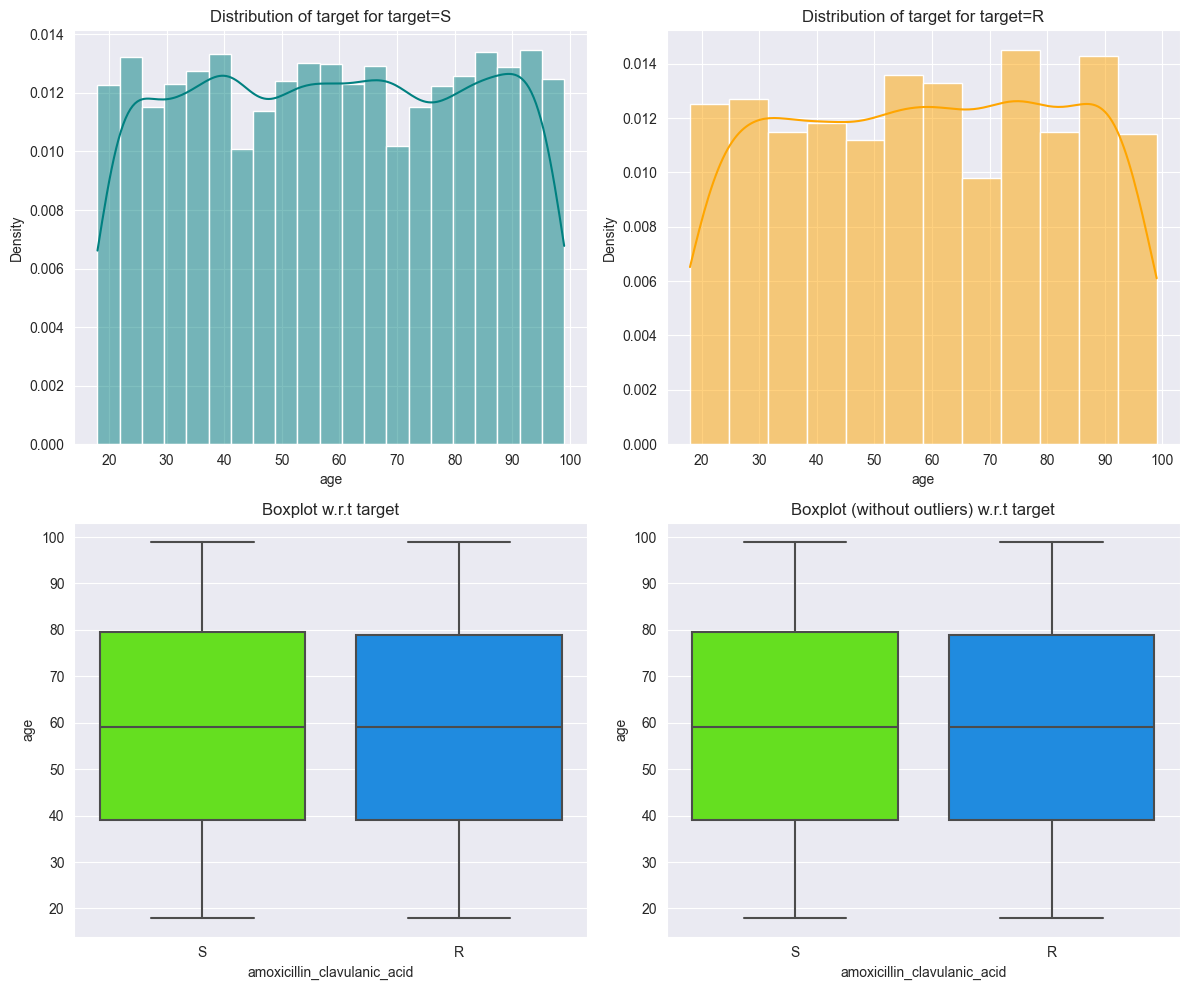

In [28]:
distribution_plot_wrt_target(data= df, predictor= 'age', target= 'amoxicillin_clavulanic_acid')

- We can see that the median age of the patients who are sensitive and resistant to amoxicillin_clavulanic_acid antibiotic is about 58 Years.
- There are no outliers in boxplots of patients age.

##### Checking for outliers in the numerical columns 

In [29]:

# Outliers removal
def outliers(df, col, method = 'quantile', strategy = 'median', drop = True):
    if method == 'quantile':
        Q3, Q2, Q1 = df[col].quantile([0.75, 0.50, 0.25])
        IQR = Q3 - Q1
        upper_lim = Q3 + (1.5 * IQR)
        lower_lim = Q1 - (1.5 * IQR)
        print(f'Outliers for {col} are: {sorted([x for x in df[col] if x < lower_lim or x > upper_lim])}\n')
        if strategy == 'median':
            df.loc[(df[col] < lower_lim) | (df[col] > upper_lim), col] = Q2
        else:
            df.loc[(df[col] < lower_lim) | (df[col] > upper_lim), col] = df[col].mean()
    elif method == 'stddev':
        col_mean, col_std, Q2 = df[col].mean(), df[col].std(), df[col].median()
        cut_off = col_std * 3
        lower_lim, upper_lim = col_mean - cut_off, col_mean + cut_off
        print(f'Outliers for {col} are: {sorted([x for x in df[col] if x < lower_lim or x > upper_lim])}\n')
        if strategy == 'median':
            df.loc[(df[col] < lower_lim) | (df[col] > upper_lim), col] = Q2
        else:
            df.loc[(df[col] < lower_lim) | (df[col] > upper_lim), col] = col_mean
    else:
      print('Please pass the correct method, strategy or drop criteria')

     

In [30]:
# Replacing outliers with mean values in these columns
print('Replacing outliers with mean values using quantile method'); print('*'*60)

df_imp = df.copy(deep = True)
outlier_cols = ['age']

for col in outlier_cols:
    outliers(df_imp, col, method = 'quantile', strategy = 'mean')

print('\nColumn for which outliers were replaced with mean using quantile method: \n', outlier_cols)


Replacing outliers with mean values using quantile method
************************************************************
Outliers for age are: []


Column for which outliers were replaced with mean using quantile method: 
 ['age']


In [31]:
print('Summary stats before outlier removal for columns with outliers'); print('*'*65); display(df[outlier_cols].describe().T)
print('\nSummary stats after outlier removal for columns with outliers'); print('*'*65); display(df_imp[outlier_cols].describe().T)

Summary stats before outlier removal for columns with outliers
*****************************************************************


,count,mean,std,min,25%,50%,75%,max
age,10108.0,58.7222,23.663027,18.0,39.0,59.0,79.0,99.0



Summary stats after outlier removal for columns with outliers
*****************************************************************


,count,mean,std,min,25%,50%,75%,max
age,10108.0,58.7222,23.663027,18.0,39.0,59.0,79.0,99.0


* From the distribution shown above, it can be seen that there no outliers in the data. The numbers are gradually increasing.

In [32]:
df_admissions.shape, df_patients.shape

((10108, 5), (10000, 3))

**Data Description:**

* One of the target variable is 'ciprofloxacin antibiotic'. It has value S is sensitive and R is resistant.
* Second target variable is 'gentamicin antibiotic'. It has value S is sensitive and R is resistant.
* Third target variable is ' amoxicillin-clavulanic acid antibiotic'. It has value S is sensitive and R is resistant.
* The continuous variables are: patient_id, date_admission and age.
* The categorical variables are: sex.
* The shape of the patients data is 10000 rows and 3 columns
* The shape of patients hospital admissions data is 10108 rows and 5 columns.

**Data Cleaning:**

* None of the columns have any missing values
* In the continuous variables, there are no outliers.

**Key Observations from EDA:**
* `Age`: The average age of patients is about 58 Years.
* For `ciprofloxacin` 90% of the patients are AMR resistant, 10% of the patients are AMR sensitive
* For `gentamicin`56% of the patients are AMR resistant, 44% of the patients are AMR sensitive
* For `amoxicillin-clavulanic acid` 85% of the patients are AMR resistant, 15% of the patients are AMR sensitive
* 46.8% of the patients are males, 39.3% are female and 14% are others.
* The median age of the patients who are sensitive and resistant to Ciprofloxacin antibiotic is about 58 Years.
* Aged patients are AMR to drug gentamicin than young patients.
* Median age of the patients who are sensitive and resistant to amoxicillin_clavulanic_acid antibiotic is about 58 Years.

In [33]:
df.head()

,patient_id,date_admission,ciprofloxacin,gentamicin,amoxicillin_clavulanic_acid,sex,age
0,7923,3,S,S,S,female,42
1,7923,2,S,R,S,female,42
2,7923,1,S,S,S,female,42
3,7825,1,S,S,R,female,21
4,5375,2,S,R,S,male,65


#### Save the dataframe as the analytical base table

In [34]:
df_ciprofloxacin = df.drop(['gentamicin', 'amoxicillin_clavulanic_acid'], axis=1)
df_ciprofloxacin.head()

,patient_id,date_admission,ciprofloxacin,sex,age
0,7923,3,S,female,42
1,7923,2,S,female,42
2,7923,1,S,female,42
3,7825,1,S,female,21
4,5375,2,S,male,65


In [35]:
df_gentamicin = df.drop(['ciprofloxacin', 'amoxicillin_clavulanic_acid'], axis=1)
df_gentamicin.head()

,patient_id,date_admission,gentamicin,sex,age
0,7923,3,S,female,42
1,7923,2,R,female,42
2,7923,1,S,female,42
3,7825,1,S,female,21
4,5375,2,R,male,65


In [36]:
df_amoxicillin_clavulanic_acid = df.drop(['ciprofloxacin', 'gentamicin'], axis=1)
df_amoxicillin_clavulanic_acid.head()

,patient_id,date_admission,amoxicillin_clavulanic_acid,sex,age
0,7923,3,S,female,42
1,7923,2,S,female,42
2,7923,1,S,female,42
3,7825,1,R,female,21
4,5375,2,S,male,65


In [38]:
# save the dataframes to csv files 
df_ciprofloxacin.to_csv('datasets/admissions_patients_ciprofloxacin.csv', index=False)
df_gentamicin.to_csv('datasets/admissions_patients_gentamicin.csv', index=False)
df_amoxicillin_clavulanic_acid.to_csv('datasets/admissions_patients_amoxicillin_clavulanic_acid.csv', index=False)

## Cool!!!